In [5]:
from gcpds.utils import loaddb
from gcpds.utils import filters as flt
from matplotlib import pyplot as plt
from ipywidgets import interact

db = loaddb.BCI2a('BCI2a_database')
db.load_subject(1, mode='evaluation')
data, classes = db.get_run(0)
data = data[0]
channels = db.metadata['channel_names']
fs = db.metadata['sampling_rate']

# Visualizations

Basic visualizations from raw data

## EEG

In [3]:
from gcpds.utils.visualizations import plot_eeg

(22, 1750)
['Fz', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'P1', 'Pz', 'P2', 'POz']


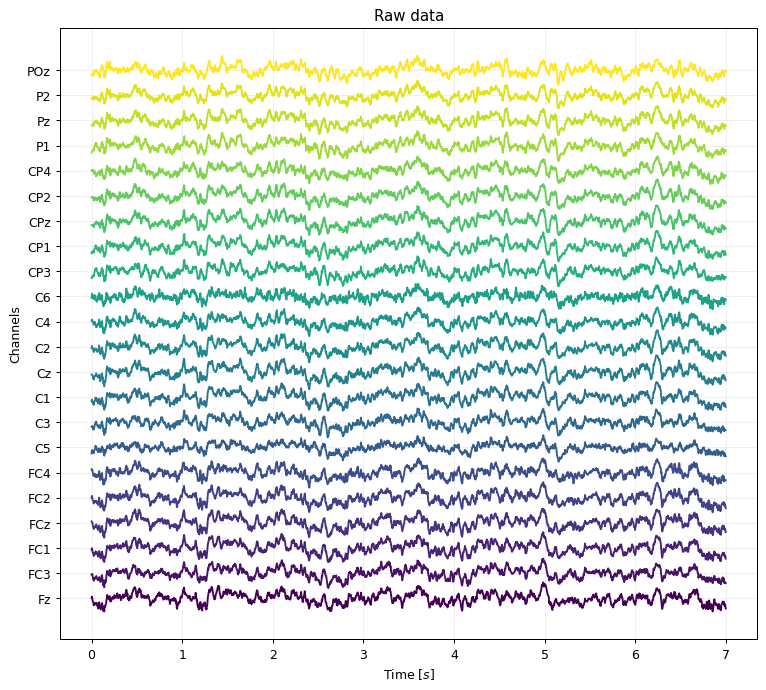

In [4]:
plt.figure(figsize=(10, 9), dpi=90)
plt.title('Raw data')
plot_eeg(data, channels, fs, sca=1.5)

print(data.shape)
print(channels)
plt.show()

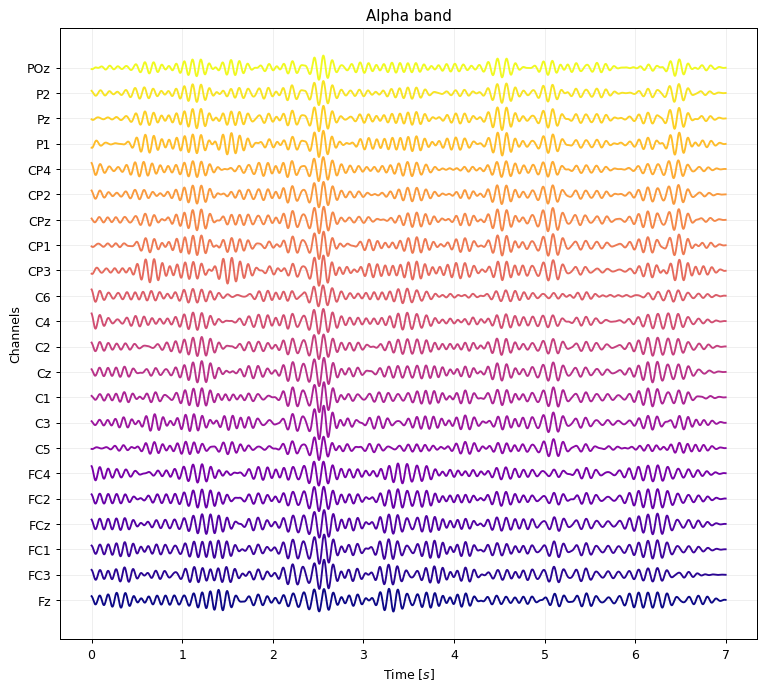

In [7]:
plt.figure(figsize=(10, 9), dpi=90)
plt.title('Alpha band')
plot_eeg(flt.alpha(data, fs=fs), channels, fs, sca=1.5, cmap='plasma')
plt.show()

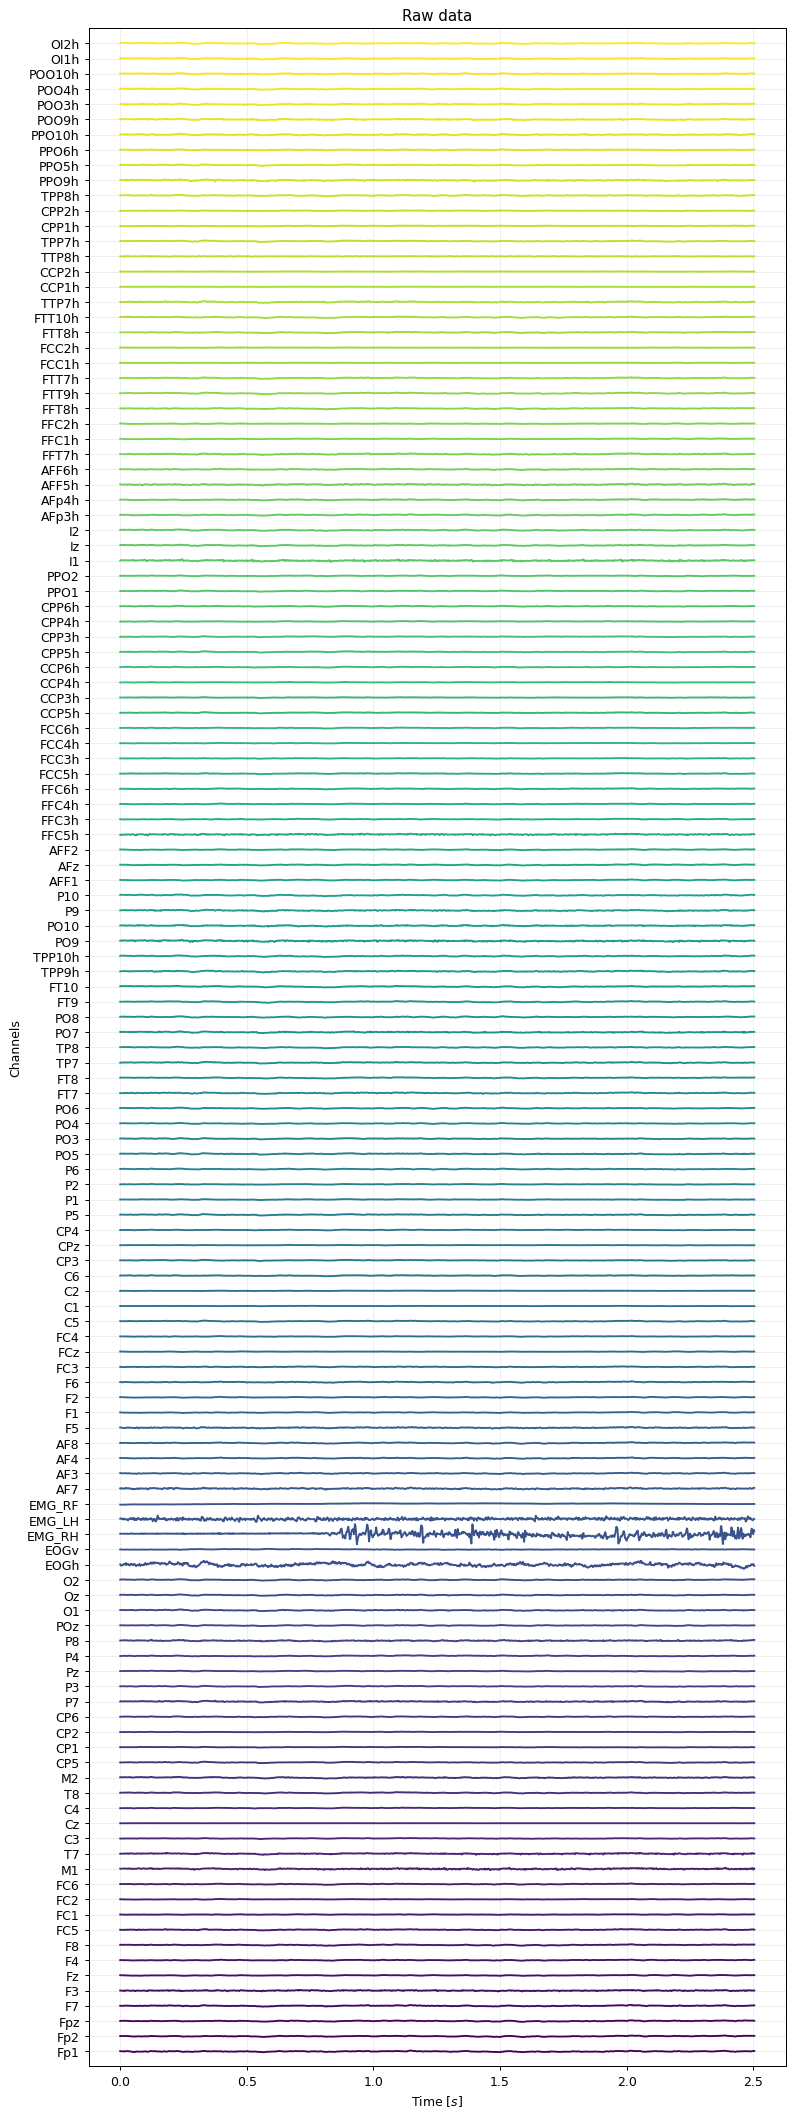

In [30]:
db_g = loaddb.HighGamma('HighGamma')
db_g.load_subject(1)
data, classes = db_g.get_run(0)
data = data[0]
channels = db_g.metadata['channel_names']
fs = db_g.metadata['sampling_rate']

plt.figure(figsize=(10, 30), dpi=90)
plt.tight_layout()
plt.title('Raw data')
plot_eeg(data, channels, fs, sca=1.5)
plt.ylim(-500, 68000)
plt.show()

## Topoplot

In [39]:
from gcpds.utils.visualizations import plot_topoplot

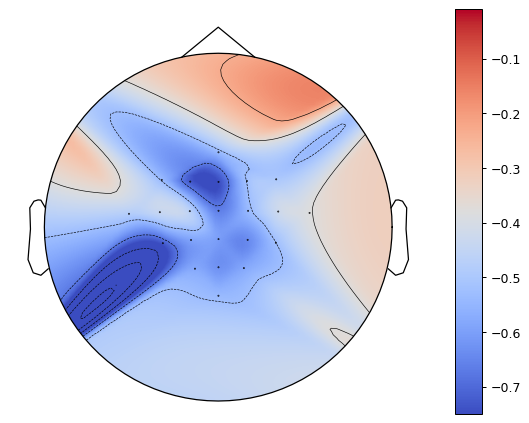

In [41]:
plt.figure(figsize=(6, 6), dpi=90)
plot_topoplot(data.mean(axis=1), channels, fs, cmap='coolwarm', montage='standard_1020')
plt.show()

In [42]:
@interact(s=(0, (data.shape[1])/fs, 0.1))
def _(s=0):
    plt.figure(figsize=(6, 6), dpi=90)
    plot_topoplot(data[:,int(s*fs)-1], channels, fs, cmap='coolwarm', vmin=data.min(), vmax=data.max())
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='s', max=7.0), Output()), _dom_classes=('widget-inter…